Importing Packages


In [1]:
from ast import literal_eval
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('https://github.com/zeerau/data-science-practice/raw/refs/heads/main/amdari/Dataset.xlsx')

In [3]:
df.head()

,CustomerID,Name,Age,Gender,Location,Email,Phone,Address,Segment,PurchaseHistory,...,ServiceInteractions,PaymentHistory,WebsiteUsage,ClickstreamData,EngagementMetrics,Feedback,MarketingCommunication,NPS,ChurnLabel,Timestamp
0,1001,Mark Barrett,31,Male,Andrewfort,allison74@example.net,3192528777,"61234 Shelley Heights Suite 467\nCohentown, GU...",Segment B,"[{'Product': 'Frozen Cocktail Mixes', 'Frequen...",...,"[{'Type': 'Call', 'Date': '2019-09-26'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 5}...","{'PageViews': 49, 'TimeSpent(minutes)': 15}","[{'Action': 'Add to Cart', 'Page': 'register',...","{'Logins': 19, 'Frequency': 'Weekly'}","{'Rating': 1, 'Comment': 'I move baby go small...","[{'Email_Sent': '2019-10-17', 'Email_Opened': ...",3,1,2020-01-27 01:36:49
1,1002,Jeremy Welch,66,Female,Millerhaven,fmiller@example.com,231-587-1818x8651,"4959 Jennifer Junction\nNew Angelaport, TN 87397",Segment C,"[{'Product': 'Watercraft Polishes', 'Frequency...",...,"[{'Type': 'Call', 'Date': '2020-01-05'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 3}...","{'PageViews': 100, 'TimeSpent(minutes)': 9}","[{'Action': 'Add to Cart', 'Page': 'homepage',...","{'Logins': 9, 'Frequency': 'Weekly'}","{'Rating': 2, 'Comment': 'Wish what bag cut li...","[{'Email_Sent': '2021-08-02', 'Email_Opened': ...",6,0,2019-01-06 18:30:03
2,1003,Brandon Patel,36,Female,Lozanostad,jasonbrown@example.org,(270)633-9095,"38701 Amanda Brook Apt. 076\nKimshire, NJ 62516",Segment B,"[{'Product': 'Vehicle Waxes, Polishes & Protec...",...,"[{'Type': 'Email', 'Date': '2019-10-09'}, {'Ty...","[{'Method': 'Credit Card', 'Late_Payments': 1}...","{'PageViews': 1, 'TimeSpent(minutes)': 97}","[{'Action': 'Search', 'Page': 'terms', 'Timest...","{'Logins': 19, 'Frequency': 'Monthly'}","{'Rating': 4, 'Comment': 'Some Democrat guess ...","[{'Email_Sent': '2021-08-29', 'Email_Opened': ...",3,0,2019-04-30 04:25:10
3,1004,Tina Martin,62,Female,South Dustin,matthew62@example.net,050.081.8706x11982,"67324 Ashley Coves\nSouth John, RI 29650",Segment C,"[{'Product': 'Mouthwash', 'Frequency': 5, 'Val...",...,"[{'Type': 'Call', 'Date': '2020-08-28'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 36...","{'PageViews': 25, 'TimeSpent(minutes)': 31}","[{'Action': 'Click', 'Page': 'privacy', 'Times...","{'Logins': 4, 'Frequency': 'Daily'}","{'Rating': 1, 'Comment': 'Yard feel never miss...","[{'Email_Sent': '2021-02-03', 'Email_Opened': ...",1,1,2020-03-03 17:33:28
4,1005,Christopher Rodriguez,68,Female,West James,shannonstrickland@example.org,+1-701-854-4915x724,"01169 Miller Mission\nWest Anthonyburgh, WY 47359",Segment C,"[{'Product': 'Ice Cream Novelties', 'Frequency...",...,"[{'Type': 'Call', 'Date': '2019-04-10'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 0}...","{'PageViews': 77, 'TimeSpent(minutes)': 51}","[{'Action': 'Click', 'Page': 'privacy', 'Times...","{'Logins': 12, 'Frequency': 'Weekly'}","{'Rating': 3, 'Comment': 'Ten determine unit i...","[{'Email_Sent': '2022-03-11', 'Email_Opened': ...",3,0,2019-04-05 22:42:22


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12483 entries, 0 to 12482
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              12483 non-null  int64 
 1   Name                    12483 non-null  object
 2   Age                     12483 non-null  int64 
 3   Gender                  12483 non-null  object
 4   Location                12483 non-null  object
 5   Email                   12483 non-null  object
 6   Phone                   12483 non-null  object
 7   Address                 12483 non-null  object
 8   Segment                 12483 non-null  object
 9   PurchaseHistory         12483 non-null  object
 10  SubscriptionDetails     12483 non-null  object
 11  ServiceInteractions     12483 non-null  object
 12  PaymentHistory          12483 non-null  object
 13  WebsiteUsage            12483 non-null  object
 14  ClickstreamData         12483 non-null  object
 15  En

In [5]:
df.duplicated().any()

np.False_

In [6]:
df.describe()

,CustomerID,Age,NPS,ChurnLabel
count,12483.00000,12483.000000,12483.000000,12483.000000
mean,7242.00000,43.930065,2.973884,0.505808
std,3603.67604,15.341521,2.644623,0.499986
min,1001.00000,18.000000,0.000000,0.000000
25%,4121.50000,31.000000,1.000000,0.000000
50%,7242.00000,44.000000,2.000000,1.000000
75%,10362.50000,57.000000,4.000000,1.000000
max,13483.00000,70.000000,9.000000,1.000000


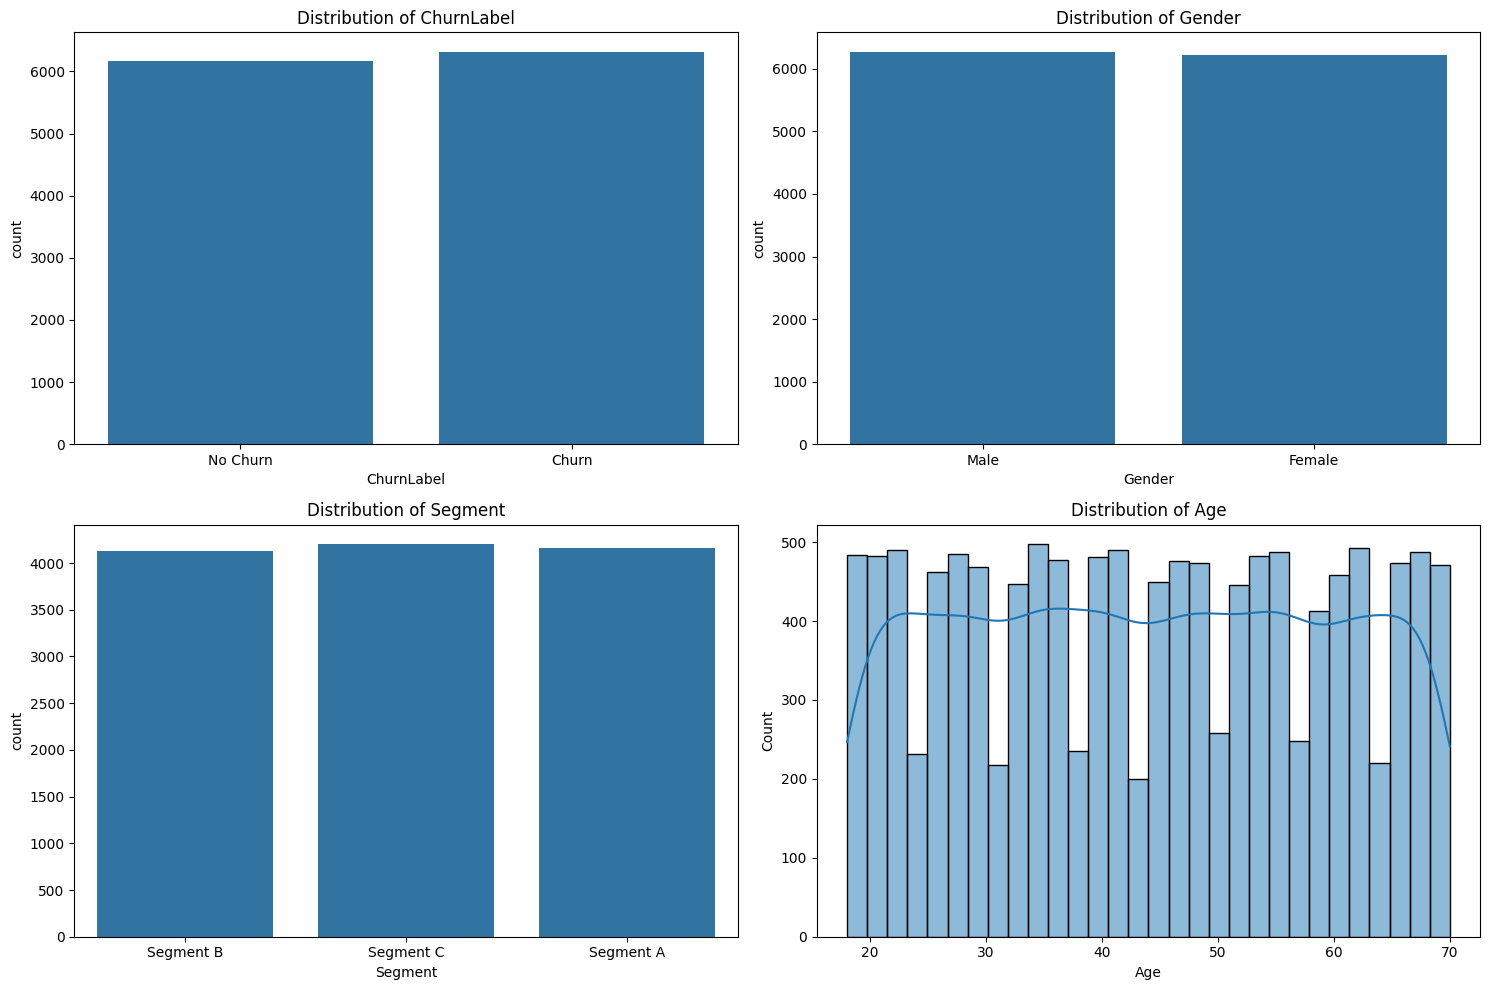

In [7]:
# set up fig and ax
fig,ax = plt.subplots(nrows= 2,ncols = 2,figsize = (15,10))

#plot distribution of churnlabel
sns.countplot(data = df,x = 'ChurnLabel',ax = ax[0,0])
ax[0,0].set_title('Distribution of ChurnLabel')
ax[0,0].set_xticklabels(['No Churn','Churn'])


#plot distribution of gender
sns.countplot(data = df,x = 'Gender',ax = ax[0,1])
ax[0,1].set_title('Distribution of Gender')
ax[0,1].set_xticklabels(['Male','Female'])

#plot distribution of segments
sns.countplot(data = df,x = 'Segment',ax = ax[1,0])
ax[1,0].set_title('Distribution of Segment')

#age distribution
sns.histplot(data = df,x = 'Age',bins=30,ax = ax[1,1],kde=True)
ax[1,1].set_title('Distribution of Age')

plt.tight_layout()
plt.show()



Correlation Analysis

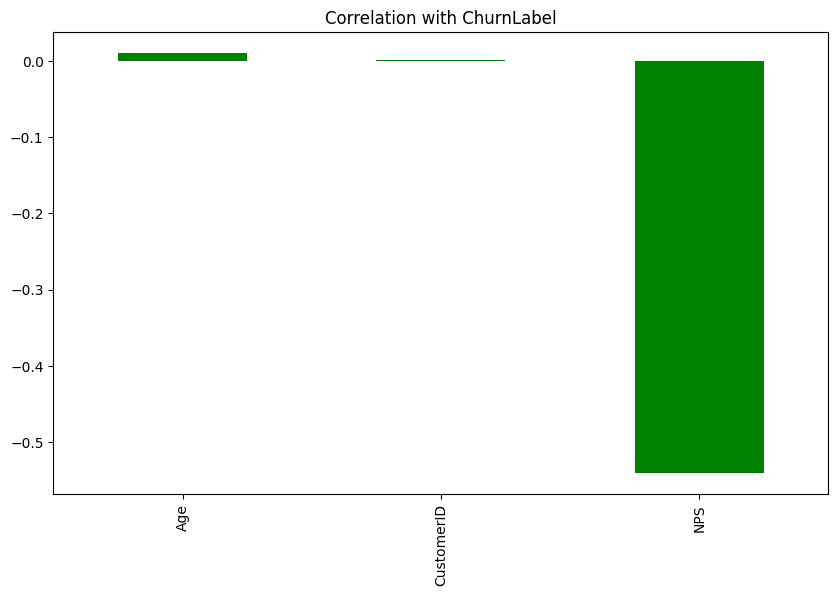

,ChurnLabel
ChurnLabel,1.000000
Age,0.010273
CustomerID,0.001530
NPS,-0.540703


In [8]:
#calculating correlation with churnlabel column
corr = df.select_dtypes(include = np.number).corr()['ChurnLabel'].sort_values(ascending = False)

#plot the correlation
plt.figure(figsize = (10,6))
corr.drop('ChurnLabel').plot(kind='bar',color='green')
plt.title('Correlation with ChurnLabel')
plt.show()
corr

In [9]:
#list out the nested columns
nested_columns =[
    'PurchaseHistory',
    'SubscriptionDetails',
    'ServiceInteractions',
    'PaymentHistory',
    'WebsiteUsage',
    'ClickstreamData',
    'EngagementMetrics',
    'Feedback',
    'MarketingCommunication'
]

#print out values of first row to each column
for column in nested_columns:
    print(f'{column}:')
    print(df[column].iloc[0])
    print()

PurchaseHistory:
[{'Product': 'Frozen Cocktail Mixes', 'Frequency': 8, 'Value': 884.43}, {'Product': 'Printer, Copier & Fax Machine Accessories', 'Frequency': 7, 'Value': 397.14}, {'Product': 'Hockey Stick Care', 'Frequency': 10, 'Value': 498.92}, {'Product': 'Guacamole', 'Frequency': 2, 'Value': 718.43}, {'Product': 'Mortisers', 'Frequency': 2, 'Value': 614.08}, {'Product': 'Rulers', 'Frequency': 6, 'Value': 221.68}, {'Product': 'Invitations', 'Frequency': 3, 'Value': 660.04}]

SubscriptionDetails:
{'Plan': 'Express', 'Start_Date': '2020-06-08', 'End_Date': '2022-10-27'}

ServiceInteractions:
[{'Type': 'Call', 'Date': '2019-09-26'}, {'Type': 'Chat', 'Date': '2021-07-25'}, {'Type': 'Email', 'Date': '2020-04-13'}, {'Type': 'Chat', 'Date': '2020-11-15'}]

PaymentHistory:
[{'Method': 'Credit Card', 'Late_Payments': 5}, {'Method': 'PayPal', 'Late_Payments': 11}, {'Method': 'Bank Transfer', 'Late_Payments': 24}]

WebsiteUsage:
{'PageViews': 49, 'TimeSpent(minutes)': 15}

ClickstreamData:
[{

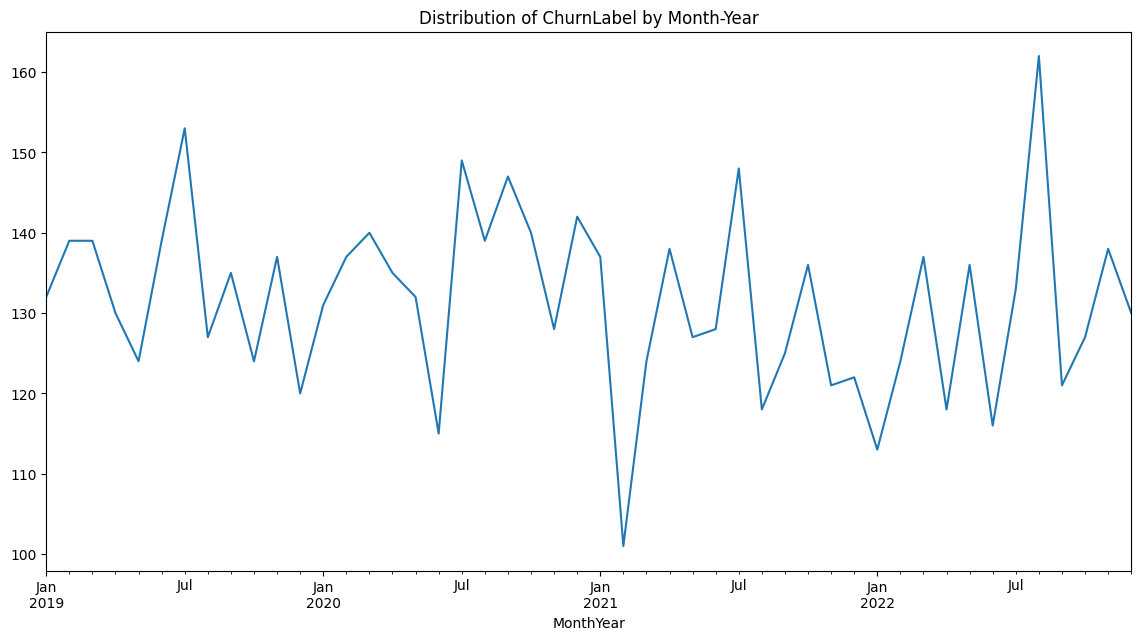

In [10]:
#Convert timestamp to datetime format

df['Timestamp'] = pd.to_datetime(df['Timestamp'])

#extract month-year from timetamp
df['MonthYear'] = df['Timestamp'].dt.to_period('M')

#group monthyear and calculate churn rates
churn_rates = df.groupby('MonthYear')['ChurnLabel'].sum()

#plot the distribution of churnlabel by month-year
plt.figure(figsize = (14,7))
churn_rates.plot()
plt.title('Distribution of ChurnLabel by Month-Year')
plt.show()

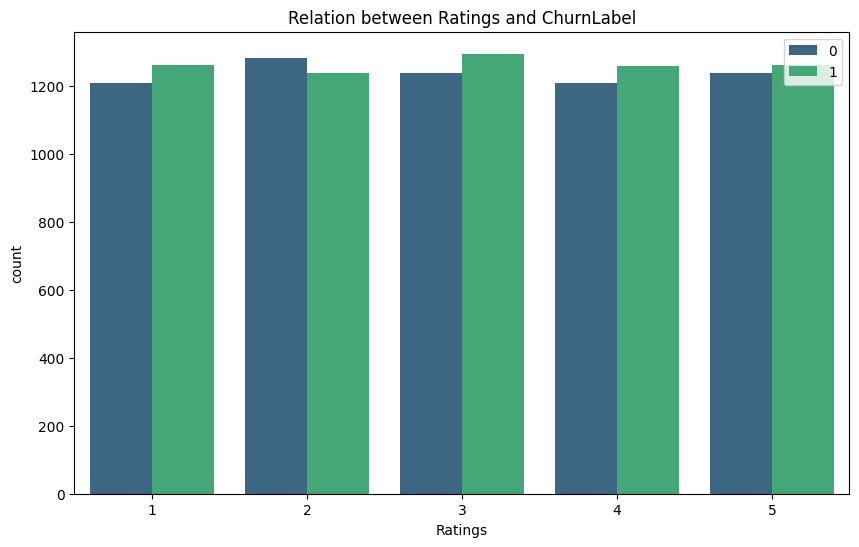

In [11]:
#finding relation between ratings and churn label
df['Ratings'] = df['Feedback'].apply(lambda x: literal_eval(x)['Rating'])

#plotting the relations
plt.figure(figsize = (10,6))
sns.countplot(data = df,x = 'Ratings',hue ='ChurnLabel',palette='viridis')
plt.title('Relation between Ratings and ChurnLabel')
plt.legend()
plt.show()

In [12]:
for features in nested_columns:
  df[features] = df[features].apply(literal_eval)

In [13]:
#extracting features from nested columns
#purchaseHistory
df['PurchaseProduct']= df['PurchaseHistory'].apply(lambda x: '|'.join([i['Product']for i in x]))
df['PurchaseFrequency']= df['PurchaseHistory'].apply(lambda x: sum([i['Frequency']for i in x]))
df['PurchaseValue'] = df['PurchaseHistory'].apply(lambda x: sum([i['Value']for i in x]))

#SubscriptionDetails
df['Subscriptionplan']= df['SubscriptionDetails'].apply(lambda x: x['Plan'])
df['SubscriptionStartDate']= df['SubscriptionDetails'].apply(lambda x: x['Start_Date'])
df['SubscriptionEndDate']= df['SubscriptionDetails'].apply(lambda x: x['End_Date'])
df['SubscriptionDuration'] = (pd.to_datetime(df['SubscriptionEndDate']) - pd.to_datetime(df['SubscriptionStartDate'])).dt.days

#websiteUsage
df['WebsitePageViews'] = df['WebsiteUsage'].apply(lambda x: x['PageViews'])
df['WebsiteTimeSpent'] = df['WebsiteUsage'].apply(lambda x: x['TimeSpent(minutes)'])

#engagementmetrics
df['EngagementLogins'] = df['EngagementMetrics'].apply(lambda x: x['Logins'])
df['EngagementFrequency'] = df['EngagementMetrics'].apply(lambda x: x['Frequency'])

#feedback
df['FeedbackRating'] = df['Feedback'].apply(lambda x: x['Rating'])
df['FeedbackComments'] = df['Feedback'].apply(lambda x: x['Comment'])

#marketingcommunication
df['NoOfEmailsSent'] = df['MarketingCommunication'].apply(lambda x: len(x))
df['OpenClickDiff'] = df['MarketingCommunication'].apply(
    lambda x: np.mean([
        (pd.to_datetime(i['Email_Clicked']) - pd.to_datetime(i['Email_Opened'])).days
        for i in x
    ])
    )
df['SentOpenDiff'] = df['MarketingCommunication'].apply(
    lambda x: np.mean([
        (pd.to_datetime(i['Email_Sent']) - pd.to_datetime(i['Email_Opened'])).days
        for i in x
    ])
    )

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12483 entries, 0 to 12482
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   CustomerID              12483 non-null  int64         
 1   Name                    12483 non-null  object        
 2   Age                     12483 non-null  int64         
 3   Gender                  12483 non-null  object        
 4   Location                12483 non-null  object        
 5   Email                   12483 non-null  object        
 6   Phone                   12483 non-null  object        
 7   Address                 12483 non-null  object        
 8   Segment                 12483 non-null  object        
 9   PurchaseHistory         12483 non-null  object        
 10  SubscriptionDetails     12483 non-null  object        
 11  ServiceInteractions     12483 non-null  object        
 12  PaymentHistory          12483 non-null  object

###Special extraction from   
* ServiceIntraction  
* PaymentHistory  
* ClickStramData

In [15]:
# get all the ServiceInteraction unique types
service_interaction_types = df['ServiceInteractions'].apply(lambda x:list(set([i['Type'] for i in x]))).explode().unique()
print('unique ServiceInteraction Type ',service_interaction_types)

#get all the PaymentHistory unique method
payment_history_methods = df['PaymentHistory'].apply(lambda x:list(set([i['Method'] for i in x]))).explode().unique()
print('unique PaymentHistory Method ',payment_history_methods)

#get all ClickstreamData unique action
clickstream_data_actions = df['ClickstreamData'].apply(lambda x:list(set([i['Action'] for i in x]))).explode().unique()
print('unique ClickstreamData Action ',clickstream_data_actions)


unique ServiceInteraction Type  ['Call' 'Email' 'Chat']
unique PaymentHistory Method  ['PayPal' 'Bank Transfer' 'Credit Card']
unique ClickstreamData Action  ['Click' 'Search' 'Add to Cart']


In [16]:
#encoding the three columns
for usit in service_interaction_types:
  df[f'ServiceInteraction_{usit}'] = df['ServiceInteractions'].apply(lambda x:len([i for i in x if i['Type'] == usit]))

df['late_payment_history'] = df['PaymentHistory'].apply(lambda x: sum(i['Late_Payments']for i in x))
df['avg_late_payment'] = df['PaymentHistory'].apply(lambda x: np.mean([i['Late_Payments']for i in x]))

for cda in clickstream_data_actions:
  df[f'ClickstreamData_{cda}'] = df['ClickstreamData'].apply(lambda x:len([i for i in x if i['Action'] == cda]))

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12483 entries, 0 to 12482
Data columns (total 47 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   CustomerID                   12483 non-null  int64         
 1   Name                         12483 non-null  object        
 2   Age                          12483 non-null  int64         
 3   Gender                       12483 non-null  object        
 4   Location                     12483 non-null  object        
 5   Email                        12483 non-null  object        
 6   Phone                        12483 non-null  object        
 7   Address                      12483 non-null  object        
 8   Segment                      12483 non-null  object        
 9   PurchaseHistory              12483 non-null  object        
 10  SubscriptionDetails          12483 non-null  object        
 11  ServiceInteractions          12483 non-nu

In [18]:
# now columns selection with numeric value
df = df[[
    'Age',
    'Gender',
    'NPS',
    'ChurnLabel',
    'PurchaseFrequency',
    'PurchaseValue',
    'WebsitePageViews',
    'WebsiteTimeSpent',
    'EngagementLogins',
    'EngagementFrequency',
    'FeedbackRating',
    'NoOfEmailsSent',
    'OpenClickDiff',
    'SentOpenDiff',
    'ServiceInteraction_Chat',
    'ServiceInteraction_Email',
    'ServiceInteraction_Call',
    'late_payment_history',
    'avg_late_payment',
    'ClickstreamData_Search',
    'ClickstreamData_Click',
    'ClickstreamData_Add to Cart',
    'SubscriptionDuration',
    'Subscriptionplan'

]]

df.head()

,Age,Gender,NPS,ChurnLabel,PurchaseFrequency,PurchaseValue,WebsitePageViews,WebsiteTimeSpent,EngagementLogins,EngagementFrequency,...,ServiceInteraction_Chat,ServiceInteraction_Email,ServiceInteraction_Call,late_payment_history,avg_late_payment,ClickstreamData_Search,ClickstreamData_Click,ClickstreamData_Add to Cart,SubscriptionDuration,Subscriptionplan
0,31,Male,3,1,38,3994.72,49,15,19,Weekly,...,2,1,1,40,13.333333,12,4,8,871,Express
1,66,Female,6,0,4,2844.35,100,9,9,Weekly,...,4,10,5,10,3.333333,7,9,8,290,Pro
2,36,Female,3,0,14,1866.52,1,97,19,Monthly,...,1,1,1,8,2.666667,7,3,2,319,Essential
3,62,Female,1,1,28,1378.64,25,31,4,Daily,...,24,18,17,79,26.333333,16,16,15,803,Smart
4,68,Female,3,0,39,2425.05,77,51,12,Weekly,...,1,5,4,2,0.666667,4,9,17,580,Basic


In [20]:
print('Total length of dataset',len(df))

df[['EngagementFrequency','Subscriptionplan','Gender']].nunique()

Total length of dataset 12483


,0
EngagementFrequency,3
Subscriptionplan,20
Gender,2


In [21]:
#encoding the columns values to numeric
df['Gender'] = df['Gender'].map({'Male':0,'Female':1})

unique_subscription_plan = df['Subscriptionplan'].unique()
unique_subscription_plan_map = {unique_subscription_plan[i]:i for i in range(len(unique_subscription_plan))}
df['Subscriptionplan'] = df['Subscriptionplan'].map(unique_subscription_plan_map)


unique_engagement = df['EngagementFrequency'].unique()
unique_engagement_map = {unique_engagement[i]:i for i in range(len(unique_engagement))}
df['EngagementFrequency'] = df['EngagementFrequency'].map(unique_engagement_map)

In [22]:
df.head()

,Age,Gender,NPS,ChurnLabel,PurchaseFrequency,PurchaseValue,WebsitePageViews,WebsiteTimeSpent,EngagementLogins,EngagementFrequency,...,ServiceInteraction_Chat,ServiceInteraction_Email,ServiceInteraction_Call,late_payment_history,avg_late_payment,ClickstreamData_Search,ClickstreamData_Click,ClickstreamData_Add to Cart,SubscriptionDuration,Subscriptionplan
0,31,0,3,1,38,3994.72,49,15,19,0,...,2,1,1,40,13.333333,12,4,8,871,0
1,66,1,6,0,4,2844.35,100,9,9,0,...,4,10,5,10,3.333333,7,9,8,290,1
2,36,1,3,0,14,1866.52,1,97,19,1,...,1,1,1,8,2.666667,7,3,2,319,2
3,62,1,1,1,28,1378.64,25,31,4,2,...,24,18,17,79,26.333333,16,16,15,803,3
4,68,1,3,0,39,2425.05,77,51,12,0,...,1,5,4,2,0.666667,4,9,17,580,4


In [23]:
df.loc[0]

,0
Age,31.000000
Gender,0.000000
NPS,3.000000
ChurnLabel,1.000000
PurchaseFrequency,38.000000
PurchaseValue,3994.720000
WebsitePageViews,49.000000
WebsiteTimeSpent,15.000000
EngagementLogins,19.000000
EngagementFrequency,0.000000


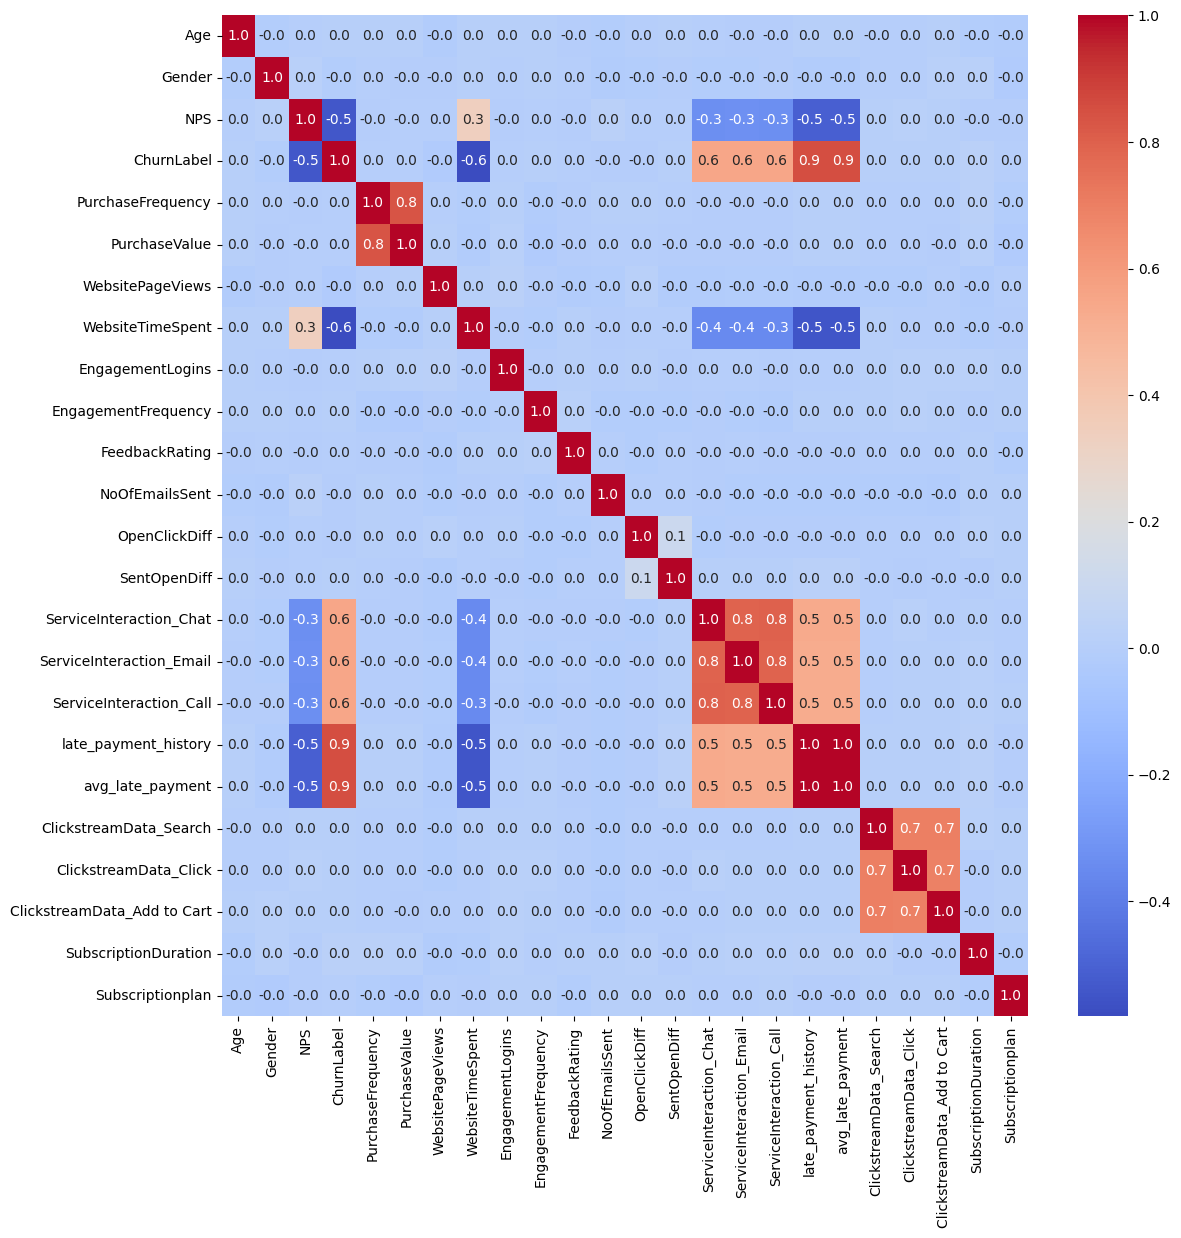

In [25]:
#plot correlation matrix
df_corr = df.corr()
fig,ax = plt.subplots(figsize = (13,13))
sns.heatmap(df_corr,annot = True,cmap = 'coolwarm',ax= ax,fmt='.1f')
plt.show()

In [26]:
#split data into train and testing side
X = df.drop('ChurnLabel',axis = 1)
y = df['ChurnLabel']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)


In [27]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [28]:
def evaluate(X,y,model,subset=''):
  y_pred = model.predict(X)

  print(f'Accuracy Score {subset}:',accuracy_score(y,y_pred))
  print(f'Precision Score {subset}:',precision_score(y,y_pred))
  print(f'Recall Score {subset}:',recall_score(y,y_pred))
  print(f'F1 Score {subset}:',f1_score(y,y_pred))

In [29]:
#model with logistic regression
lr = LogisticRegression()
lr.fit(X_train,y_train)
evaluate(X_train,y_train,lr,'Train')
evaluate(X_test,y_test,lr,'Test')

Accuracy Score Train: 0.9724193179217212
Precision Score Train: 0.9779093600546572
Recall Score Train: 0.9675529517800812
F1 Score Train: 0.9727035904405935
Accuracy Score Test: 0.9666221628838452
Precision Score Test: 0.9699409554482018
Recall Score Test: 0.9632196162046909
F1 Score Test: 0.9665686012302754


In [31]:
#model with decisiontreeclassifier
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train,y_train)
evaluate(X_train,y_train,dt,'Train')
evaluate(X_test,y_test,dt,'Test')

Accuracy Score Train: 0.9779125658045319
Precision Score Train: 0.9792278166629036
Recall Score Train: 0.9772420009013069
F1 Score Train: 0.9782339009811661
Accuracy Score Test: 0.9706275033377837
Precision Score Test: 0.9696808510638298
Recall Score Test: 0.9717484008528785
F1 Score Test: 0.9707135250266241


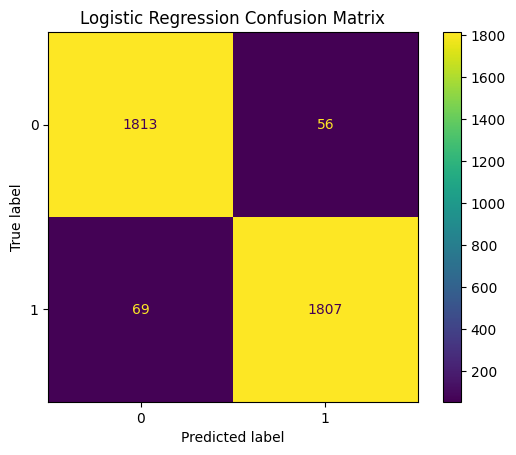

In [32]:
#plotting the confusion matrix for both models
lr_y_pred = lr.predict(X_test)
dt_y_pred = dt.predict(X_test)
lr_confusion_matrix = confusion_matrix(y_test,lr_y_pred)
dt_confusion_matrix = confusion_matrix(y_test,dt_y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=lr_confusion_matrix,display_labels=lr.classes_)
display.plot()
plt.title('Logistic Regression Confusion Matrix')
plt.show()


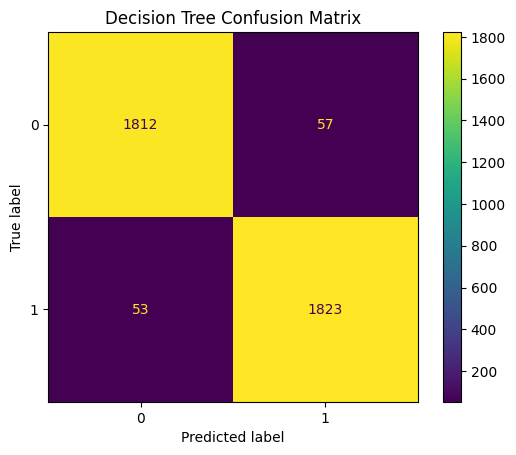

In [33]:
dt_display = ConfusionMatrixDisplay(confusion_matrix=dt_confusion_matrix,display_labels=dt.classes_)
dt_display.plot()
plt.title('Decision Tree Confusion Matrix')
plt.show()

# Customer Churn Prediction

## Overview

This project aims to predict customer churn based on various customer attributes and behaviors. By analyzing factors such as demographics, purchase history, website usage, and engagement metrics, this project develops machine learning models to identify customers who are likely to churn.

## Processes

The project follows these steps:

1.  **Data Loading and Exploration**: The dataset, containing customer information and their churn status, is loaded and explored to understand its structure, identify missing values, and analyze basic statistics and distributions of key features.
2.  **Feature Engineering**: Relevant features are extracted from nested columns in the dataset, such as purchase frequency, subscription duration, website activity, and engagement metrics. Categorical features like Gender, Engagement Frequency, and Subscription Plan are encoded into numerical representations.
3.  **Correlation Analysis**: The correlation between different features and the churn label is analyzed to understand which factors are most strongly associated with churn.
4.  **Data Splitting**: The dataset is split into training and testing sets to train and evaluate the performance of machine learning models.
5.  **Data Scaling**: Numerical features are scaled using StandardScaler to ensure that no single feature dominates the model training process.
6.  **Model Training and Evaluation**: Logistic Regression and Decision Tree Classifier models are trained on the preprocessed data. Their performance is evaluated using metrics such as accuracy, precision, recall, and F1-score on both the training and testing sets.
7.  **Confusion Matrix Analysis**: Confusion matrices are plotted for both models to visualize their performance in classifying churn and non-churn customers.

## Tools

The following tools and libraries were used in this project:

*   **pandas**: For data manipulation and analysis.
*   **numpy**: For numerical operations.
*   **matplotlib.pyplot** and **seaborn**: For data visualization.
*   **sklearn**: For machine learning model training and evaluation, including `accuracy_score`, `precision_score`, `recall_score`, `f1_score`, `confusion_matrix`, `ConfusionMatrixDisplay`, `train_test_split`, `StandardScaler`, `LogisticRegression`, and `DecisionTreeClassifier`.
*   **tqdm**: For displaying progress bars (although not explicitly used in the provided code, it's imported).
*   **ast**: For safely evaluating string literals containing Python expressions.
*   **warnings**: For managing warnings.

## Conclusion

The project successfully demonstrates the process of predicting customer churn using machine learning. By extracting relevant features, preprocessing the data, and training models like Logistic Regression and Decision Tree Classifier, we can identify potential churners. The evaluation metrics and confusion matrices provide insights into the performance of these models. Further steps could involve exploring other machine learning algorithms, hyperparameter tuning, and feature selection to potentially improve the prediction accuracy.

In [34]:
readme_content = """
# Customer Churn Prediction

## Overview

This project aims to predict customer churn based on various customer attributes and behaviors. By analyzing factors such as demographics, purchase history, website usage, and engagement metrics, this project develops machine learning models to identify customers who are likely to churn.

## Processes

The project follows these steps:

1.  **Data Loading and Exploration**: The dataset, containing customer information and their churn status, is loaded and explored to understand its structure, identify missing values, and analyze basic statistics and distributions of key features.
2.  **Feature Engineering**: Relevant features are extracted from nested columns in the dataset, such as purchase frequency, subscription duration, website activity, and engagement metrics. Categorical features like Gender, Engagement Frequency, and Subscription Plan are encoded into numerical representations.
3.  **Correlation Analysis**: The correlation between different features and the churn label is analyzed to understand which factors are most strongly associated with churn.
4.  **Data Splitting**: The dataset is split into training and testing sets to train and evaluate the performance of machine learning models.
5.  **Data Scaling**: Numerical features are scaled using StandardScaler to ensure that no single feature dominates the model training process.
6.  **Model Training and Evaluation**: Logistic Regression and Decision Tree Classifier models are trained on the preprocessed data. Their performance is evaluated using metrics such as accuracy, precision, recall, and F1-score on both the training and testing sets.
7.  **Confusion Matrix Analysis**: Confusion matrices are plotted for both models to visualize their performance in classifying churn and non-churn customers.

## Tools

The following tools and libraries were used in this project:

*   **pandas**: For data manipulation and analysis.
*   **numpy**: For numerical operations.
*   **matplotlib.pyplot** and **seaborn**: For data visualization.
*   **sklearn**: For machine learning model training and evaluation, including `accuracy_score`, `precision_score`, `recall_score`, `f1_score`, `confusion_matrix`, `ConfusionMatrixDisplay`, `train_test_split`, `StandardScaler`, `LogisticRegression`, and `DecisionTreeClassifier`.
*   **tqdm**: For displaying progress bars (although not explicitly used in the provided code, it's imported).
*   **ast**: For safely evaluating string literals containing Python expressions.
*   **warnings**: For managing warnings.

## Conclusion

The project successfully demonstrates the process of predicting customer churn using machine learning. By extracting relevant features, preprocessing the data, and training models like Logistic Regression and Decision Tree Classifier, we can identify potential churners. The evaluation metrics and confusion matrices provide insights into the performance of these models. Further steps could involve exploring other machine learning algorithms, hyperparameter tuning, and feature selection to potentially improve the prediction accuracy.
"""

with open('README.md', 'w') as f:
    f.write(readme_content)

print("README.md has been created in your current directory.")

README.md has been created in your current directory.
